In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs                           #генерируем данные
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn import neighbors 
from sklearn.neighbors import KNeighborsClassifier

In [5]:
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
X_D2, y_D2 = make_blobs(n_samples = 200, n_features = 2, centers = 8, 
                        cluster_std = 1.3, random_state = 4)

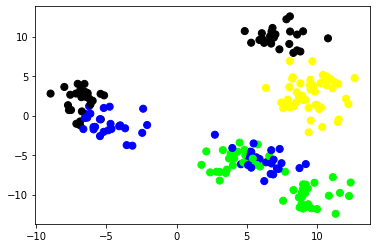

In [6]:
plt.figure()                                                                           #визуализация данных
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)#разделение данных на тренир. и тест. множества

In [8]:
for i in range(1, 5):
    clf = neighbors.KNeighborsClassifier(n_neighbors=i, weights='distance')                #создадим классификатор
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)                                                      #вычислим результат классификации

In [10]:
    print('KNN ', clf)                                                                     #оценим качество классификации
    print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
    print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
    print(confusion_matrix(y_test,predictions))
    print(classification_report(y_test, predictions))

KNN  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')
Accuracy of KNN classifier on training set: 1.00
Accuracy of KNN classifier on test set: 0.78
[[9 1 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0]
 [0 0 4 0 0 2 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 7 0 0 2 0 0]
 [0 0 0 0 0 0 8 0]
 [0 0 0 0 1 0 0 5]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.88      1.00      0.93         7
           2       0.36      0.67      0.47         6
           3       1.00      1.00      1.00         3
           4       0.50      1.00      0.67         1
           5       0.50      0.22      0.31         9
           6       1.00      1.00      1.00         8
           7       1.00      0.83      0.91         6

    accuracy                           0.78        50
   macro avg      

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot,plot_class_regions_for_classifier

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

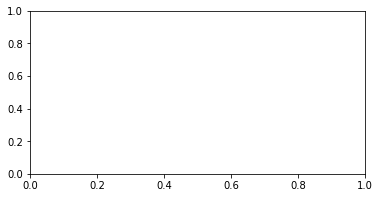

In [18]:
fig, subaxes = plt.subplots(1, 1, figsize=(6, 3))
this_C = 5.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)

In [14]:
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, 
                                          None, None, title, subaxes)
predictions = clf.predict(X_test)

In [15]:
print('Logistic regression classifier \n ', clf)
print('Accuracy of LR classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of LR classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Logistic regression classifier 
  SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Accuracy of LR classifier on training set: 0.91
Accuracy of LR classifier on test set: 0.80


In [16]:
matrix = confusion_matrix(y_test, predictions)#,labels)
print(matrix)
print(classification_report(y_test, predictions))

[[8 2 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0]
 [0 0 4 0 0 2 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 5 0 0 4 0 0]
 [0 0 0 0 0 0 8 0]
 [0 0 0 0 1 0 0 5]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.78      1.00      0.88         7
           2       0.44      0.67      0.53         6
           3       1.00      1.00      1.00         3
           4       0.50      1.00      0.67         1
           5       0.67      0.44      0.53         9
           6       1.00      1.00      1.00         8
           7       1.00      0.83      0.91         6

    accuracy                           0.80        50
   macro avg       0.80      0.84      0.80        50
weighted avg       0.83      0.80      0.80        50



In [17]:
print('training results')
predictions = clf.predict(X_train )
print(classification_report(y_train, predictions))

training results
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.94      0.97        18
           2       0.79      0.79      0.79        19
           3       1.00      0.95      0.98        22
           4       0.95      0.88      0.91        24
           5       0.71      0.75      0.73        16
           6       1.00      1.00      1.00        17
           7       0.86      0.95      0.90        19

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150

